# Basic Data Exploration

Investigate the raw data (or rather the merged Dataframe) to get some insights.


In [7]:
# 📦 Kedro Environment Setup

%load_ext kedro.ipython
%reload_kedro

# You should now have access to:
# - `catalog` for loading/saving datasets
# - `context` for accessing Kedro project config
# - `session` for running pipelines
# - `pipeline` for the default pipeline (or define others below)


The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[05/04/25 20:40:45] INFO     Resolved project path as:                                              ]8;id=639450;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=779257;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/sascha/Documents/DSR/DengAI--Competition.                                       
                             To set a different path, run '%reload_kedro <project_root>'                           

                    WARNING  /home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/ked ]8;id=726318;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=63671;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/warnings.py#110\110]8;;\
                             ro/io/data_catalog.py:165: KedroDeprecationWarning:                                   
                                                                                                                   
                             `DataCatalog` has been deprecated and will be replaced by                             
                             `KedroDataCatalog`, in Kedro 1.0.0.Currently some `KedroDataCatalog`                  
                             APIs have been retained for compatibility with `DataCatalog`,                         
                             including the `datasets` property and the `get_datasets`,                             
                             `_get_datasets`, `add`,` list`, `add_feed_dict`, and `shallow_copy`                   
                             methods. These will be removed or replaced with updated alternatives                  
                             in Kedro 1.0.0. For more details, refer to the documentation:                         
                             https://docs.kedro.org/en/stable/data/index.html#kedrodatacatalog-expe                
                             rimental-feature                                                                      
                                                                                                                   
                                                                                                                   

                    WARNING  /home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/ked ]8;id=546189;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=348632;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/warnings.py#110\110]8;;\
                             ro/io/data_catalog.py:165: KedroDeprecationWarning:                                   
                                                                                                                   
                             `DataCatalog` has been deprecated and will be replaced by                             
                             `KedroDataCatalog`, in Kedro 1.0.0.Currently some `KedroDataCatalog`                  
                             APIs have been retained for compatibility with `DataCatalog`,                         
                             including the `datasets` property and the `get_datasets`,                             
                             `_get_datasets`, `add`,` list`, `add_feed_dict`, and `shallow_copy`                   
                             methods. These will be removed or replaced with updated alternatives                  
                             in Kedro 1.0.0. For more details, refer to the documentation:                         
                             https://docs.kedro.org/en/stable/data/index.html#kedrodatacatalog-expe                
                             rimental-feature                                                                      
                                                                                                                   
                                                                                                                   

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=333802;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=228848;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[05/04/25 20:40:46] INFO     Kedro project dengAI                                                   ]8;id=674512;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=898;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=709774;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=7392;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=294644;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=662275;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [8]:
# imports
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# load data and remove observations without target (test data)
raw = catalog.load("merged_data")
raw = raw.dropna(subset="total_cases")
raw.head()

                    INFO     Loading data from merged_data (ParquetDataset)...                  ]8;id=624239;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=358955;file:///home/sascha/anaconda3/envs/mini_comp/lib/python3.13/site-packages/kedro/io/data_catalog.py#401\401]8;;\

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [10]:
# Inspect total cases based on city
px.line(
    raw,
    x="week_start_date",
    y="total_cases",
    color="city",
    title="Cases by City over Time",
)

Two observations:
- For SanJuan (sj) there are FAR more observations
- The maximum absolute number of cases is much lower for Iquitos (iq)

For comparison I could scale this relative to population but for that I would need the actual population at the respective timepoint. for that I'll import another piece of data:
[Iquitos Populus](https://www.macrotrends.net/global-metrics/cities/22076/iquitos/population#google_vignette), [San Juan Populus](https://www.macrotrends.net/global-metrics/cities/22177/san-juan/population)

In [11]:
# scale to total population and replot
iq_pop = pd.read_csv("../data/01_raw/iq_population.csv")
iq_pop["city"] = "iq"
sj_pop = pd.read_csv("../data/01_raw/sj_population.csv")
sj_pop["city"] = "sj"

pops = pd.concat([iq_pop, sj_pop])

pop_data = pd.merge(raw, pops, "left", on=["year", "city"])
pop_data["relative_cases"] = pop_data.total_cases / pop_data.population * 1000
px.line(
    pop_data,
    x="week_start_date",
    y="relative_cases",
    color="city",
    title="Relative Cases per City over Time",
    labels=dict(relative_cases="Cases per Population [\u2030]"),
)

Telling.  
Relative to the total population, the case numbers are in comparable ranges, IQ even had the worse outbreak.  

It might be interesting to either increase the amount of outbrreak data, for the model to predict those more reliably or to change the problem into a classification problem first (outbreak, no outbreak) to then create two more models to predict outbreak an non-outbreak case numbers. For that we need a definition of outbreak, maybe percentile based.

In [88]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Compute 85th percentiles per city
p85 = pop_data.groupby("city")["relative_cases"].quantile(0.85)

# Create subplots: 1 row, 2 columns
fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=("Relative Cases in iq", "Relative Cases in sj"),
        specs=[[{"secondary_y": True}],
                [{"secondary_y": True}]]
)

# Plot for "iq"
iq_data = pop_data[pop_data["city"] == "iq"]
fig.add_trace(
    go.Scatter(
        x=iq_data["week_start_date"],
        y=iq_data["relative_cases"],
        mode="lines",
        name="iq",
    ),
    row=1,
    col=1,
)
fig.add_hline(
    y=p85["iq"],
    line_dash="dot",
    line_color="orange",
    annotation_text="85th %",
    annotation_position="top left",
    row=1,
    col=1,
)

# Plot for "sj"
sj_data = pop_data[pop_data["city"] == "sj"]
fig.add_trace(
    go.Scatter(
        x=sj_data["week_start_date"],
        y=sj_data["relative_cases"],
        mode="lines",
        name="sj",
    ),
    row=2,
    col=1,
)
fig.add_hline(
    y=p85["sj"],
    line_dash="dot",
    line_color="green",
    annotation_text="85th %",
    annotation_position="top left",
    row=2,
    col=1,
)

# Update layout
fig.update_layout(
    title_text="Relative Cases per City over Time",
    showlegend=False,
    height=900,
    width=2500,
)

fig.update_xaxes(
    title_text="Week Start Date",
    dtick="M1",
    tickformat="%b",
    ticklabelmode="period",
    tick0="",
    row=1,
    col=1,
)
fig.update_xaxes(
    title_text="Week Start Date",
    dtick="M1",
    tickformat="%b",
    ticklabelmode="period",
    row=2,
    col=1,
)
fig.update_yaxes(title_text="Cases per Population [‰]", row=1, col=1)
fig.update_yaxes(title_text="Cases per Population [‰]", row=2, col=1)
fig.show()

OK. Looks like we could say an outbreak is defined as a time period of X weeks with continuous relative case numbers above the 85th percentile. Outside of this, the cases fluctuate probably with season?  
To investigate this, we look at the typical seasons in sj and iq.  
in SanJose, there is a differentiation between wet and dry season, wet from may to november.  
in iquitos, the wet season is from october till june but in generall there is more rain.

Now, that there is a comparable measurement of cases, lets look at the features. Since the cities are quite distinct, ill look at all explorations seperated by city for now.  
First I want to see how all the features correlate with each other to seee if I can maybe combine some to reduce the total number of features.

Text(0.5, 1.0, '')

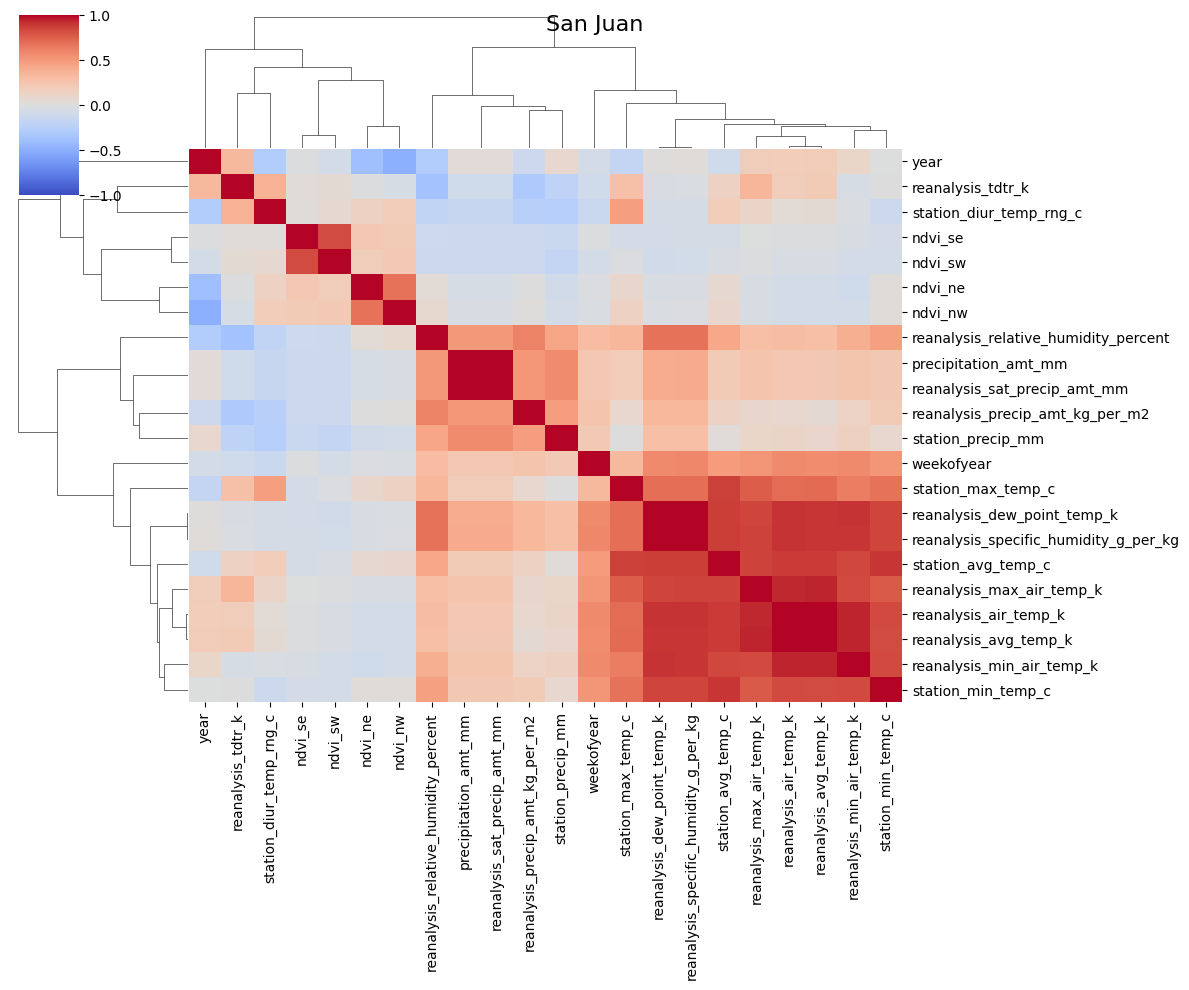

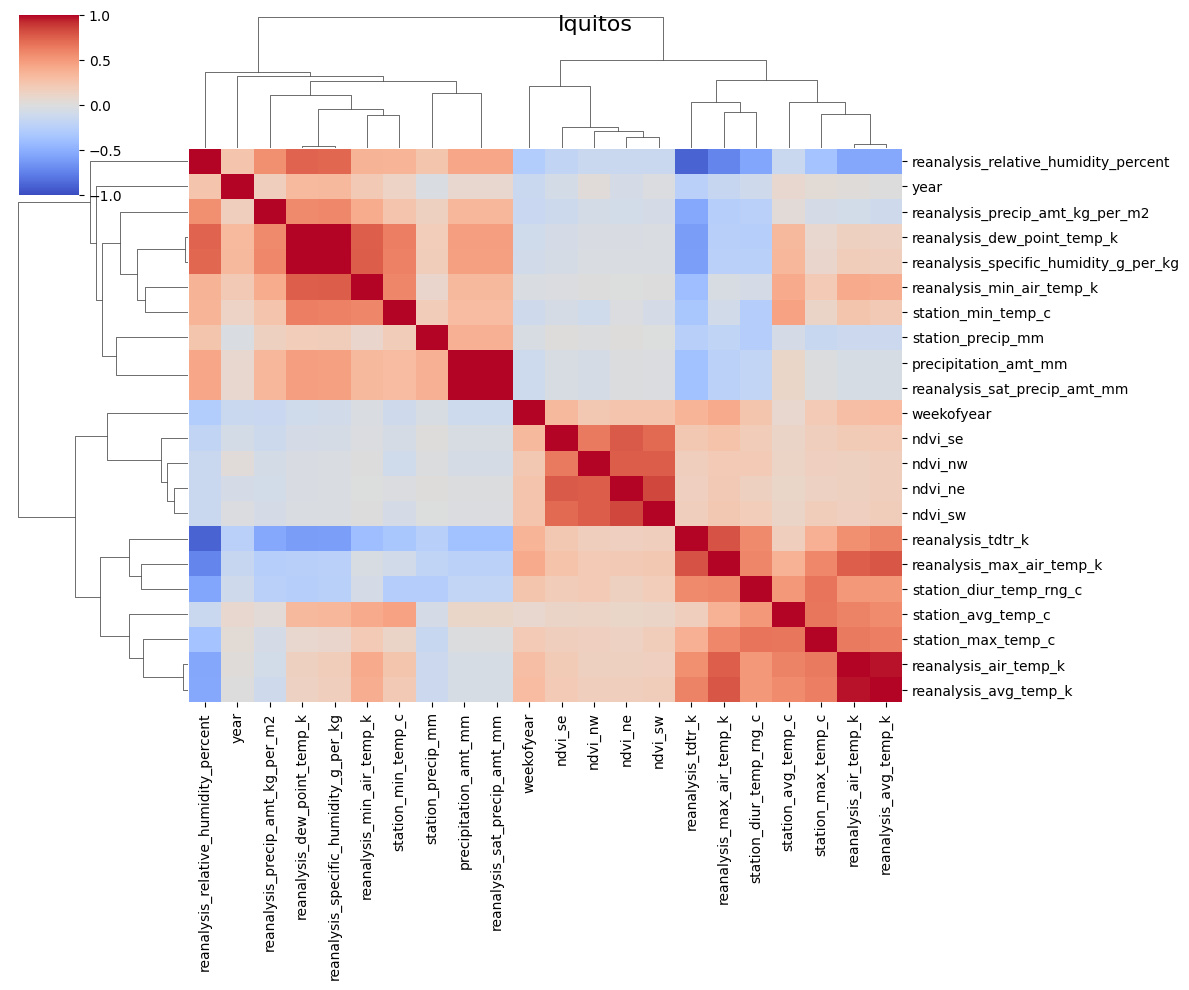

In [14]:
# Feature correlation
correlation_sj = raw[raw.city == "sj"].drop(["city", "week_start_date", 'total_cases'], axis=1).corr()
correlation_iq = raw[raw.city == "iq"].drop(["city", "week_start_date", 'total_cases'], axis=1).corr()


# Clustered heatmap for San Juan
g1 = sns.clustermap(
    correlation_sj, cmap="coolwarm", center=0, vmin=-1, vmax=1, figsize=(12, 10)
)
g1.figure.suptitle("San Juan", fontsize=16)
g1.ax_heatmap.set_title("")  # optional: suppress the default title

# Clustered heatmap for Iquitos
g2 = sns.clustermap(
    correlation_iq, cmap="coolwarm", center=0, vmin=-1, vmax=1, figsize=(12, 10)
)
g2.figure.suptitle("Iquitos", fontsize=16)
g2.ax_heatmap.set_title("")

Some correlations are not surprising — for example, the strong relationship between various temperature measurements and the dew point is expected.  
On the other hand, iq shows a strong correlation with the surrounding forest (also expected), while sj displays a clear separation between the northern and southern areas.  
For feature reduction, I would suggest consolidating the temperature variables into a single average temperature while retaining the other weather-related features.  
Additionally, the forest data could be reduced to two columns: north and south. In a per-city approach, this could be simplified even further for iq.

Let's have a look at the relationship between features and the target variable next.

In [70]:
# Target correlation
target_correlation_sj = pop_data[pop_data.city == "sj"].drop(["city", "week_start_date", 'total_cases', 'population'], axis=1).corr().abs().rank(ascending=False)
target_correlation_iq = pop_data[pop_data.city == "iq"].drop(["city", "week_start_date", 'total_cases', 'population'], axis=1).corr().abs().rank(ascending=False)
df = pd.concat([target_correlation_iq.relative_cases.rename('iq'), target_correlation_sj.relative_cases.rename('sj')], axis=1).sort_values('sj')
df

,iq,sj
relative_cases,1.0,1.0
weekofyear,23.0,2.0
year,6.0,3.0
reanalysis_specific_humidity_g_per_kg,2.0,4.0
reanalysis_dew_point_temp_k,3.0,5.0
station_avg_temp_c,9.0,6.0
station_max_temp_c,15.0,7.0
reanalysis_max_air_temp_k,17.0,8.0
reanalysis_min_air_temp_k,5.0,9.0
reanalysis_air_temp_k,10.0,10.0


The high correlation with the time is expected for SanJose, since there is a lot of data and outbreaks are relatively few, so the main predictor would be the seasonal change. But since we are more interested in the environmental effects lets look at those only:

In [71]:
# Target correlation remove weeks and years
target_correlation_sj = pop_data[pop_data.city == "sj"].drop(["city", "week_start_date", 'total_cases', 'population', 'weekofyear', 'year'], axis=1).corr().abs().rank(ascending=False)
target_correlation_iq = pop_data[pop_data.city == "iq"].drop(["city", "week_start_date", 'total_cases', 'population', 'weekofyear', 'year'], axis=1).corr().abs().rank(ascending=False)
df = pd.concat([target_correlation_iq.relative_cases.rename('iq'), target_correlation_sj.relative_cases.rename('sj')], axis=1).sort_values('sj')
df

,iq,sj
relative_cases,1.0,1.0
reanalysis_specific_humidity_g_per_kg,2.0,2.0
reanalysis_dew_point_temp_k,3.0,3.0
station_avg_temp_c,8.0,4.0
station_max_temp_c,14.0,5.0
reanalysis_max_air_temp_k,16.0,6.0
reanalysis_min_air_temp_k,5.0,7.0
reanalysis_air_temp_k,9.0,8.0
station_min_temp_c,4.0,9.0
reanalysis_avg_temp_k,13.0,10.0


Now, that paints a clearer picture. The main influence in both cities is humidity, followed by temperature. Let's reuse the plot from earlier and see how the specific humidity fits into the relative cases ofer time.

In [91]:
fig.add_trace(
    go.Scatter(
        x=iq_data['week_start_date'],
        y=iq_data['reanalysis_specific_humidity_g_per_kg'],
        mode='lines',
        name='humidity'
    ),
    1,
    1,
    secondary_y=True
)
fig.add_trace(
    go.Scatter(
        x=sj_data['week_start_date'],
        y=sj_data['reanalysis_specific_humidity_g_per_kg'],
        mode='lines',
        name='humidity'
    ),
    2,
    1,
    secondary_y=True
)
fig.update_yaxes(
    title_text="Specific Humidity [g/kg]",
    secondary_y=True
)
fig.show()

Here we can see: A Rise in Humidity roughly 4 weeks ago seems to be an adequate indicator for an outbreak. Further we can see that the level of humidity reached does not play a role in creating and outbreak.

# Summary

overall the two cities are fairly different, since their seasons don't overlap, their population differs greatly and the data quantity is so different.  
There are several assumptions I draw from this exploration:
- total_cases should be modfied to relative_cases and recaculated post prediction
- creating a balanced datasaet and try a classification approach seems like an interesting idea
- Reducing highly correlated features might be worthwhile
- tbc